In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
def WD_diff(t, y, zc):
    y0, dy0_dt = y[0: 2]
    dy1_dt = -(2/t)*dy0_dt-(y0**2-1/zc**2)**(3/2)
    return [dy0_dt, dy1_dt]
def boundary_sphere(t, y, zc):
    y0, dy0_dt = y[0: 2]
    return y0-1/zc
y_ini = [1., 0.]
t_rng = [1e-12, 50]

In [4]:
zc_test = np.sqrt(1/0.2)
sol_test = solve_ivp(WD_diff, t_rng, y_ini, args=(zc_test, ), events = boundary_sphere, dense_output=True, atol=1e-13, rtol=1e-13)

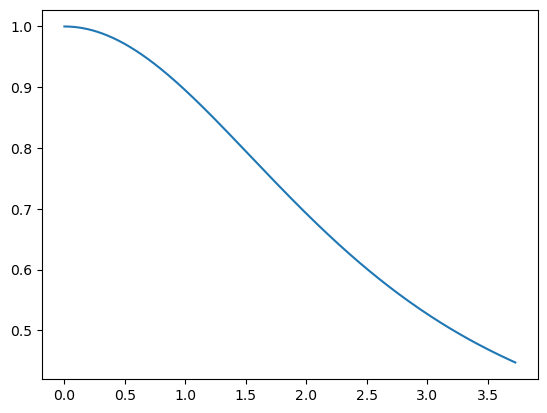

In [5]:
plt.plot(sol_test.t, sol_test.y[0])
plt.show()

In [6]:
max(sol_test.t)

3.7271063260757646

In [7]:
-sol_test.t[-1]**2*sol_test.y[1][-1]

1.243029792504026

In [8]:
-sol_test.t[-1]**2*sol_test.y[1][-1]*0.717

0.8912523612253865

In [9]:
(sol_test.t[-1]/zc_test)*3884.41218

6474.587246382187

In [10]:
len(sol_test.t)

321

In [11]:
log10_z_c = np.linspace(0.006, 3, 3000)
M_star = [] # in unit of M_Sun
R_star = [] # in unit of 10^(3)km 
for i in range(len(log10_z_c)):
    sol_i = solve_ivp(WD_diff, t_rng, y_ini, args=(10**log10_z_c[i], ), events = boundary_sphere, dense_output=True, atol=1e-13, rtol=1e-13)
    R_star.append((sol_i.t[-1]/10**log10_z_c[i])*3884.41218e-3)
    M_star.append(-sol_i.t[-1]**2*sol_i.y[1][-1]*0.717)

#print(R_star, M_star)

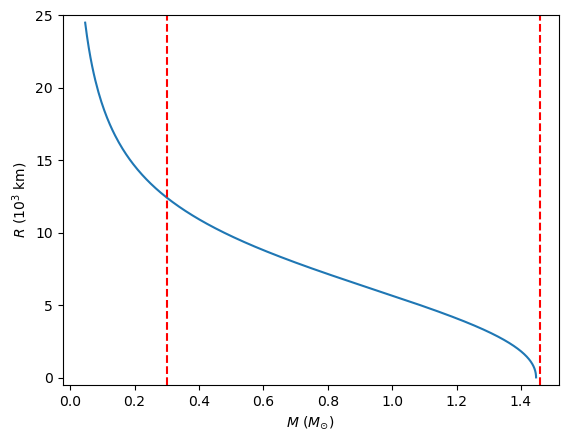

In [12]:
plt.plot(M_star, R_star)
plt.axvline(x=5.836/2**2, linestyle='--', color='red')
plt.axvline(x=0.3, linestyle='--', color='red')
plt.xlabel(r'$M\ (M_{\odot})$')
plt.ylabel(r'$R\ (10^{3}\ \mathrm{km})$')
plt.ylim((-0.5, 25))
#plt.savefig('/Users/zengyuhe/academic_doc/HWs/stellar/figures/WD_MR.pdf')
plt.show()

In [13]:
from scipy.interpolate import interp1d

In [14]:
inter_MR = interp1d(M_star, R_star, kind='cubic', fill_value='extrapolate')

M_inter = np.linspace(1/10000, 1.43, 2000)
R_inter = inter_MR(M_inter)

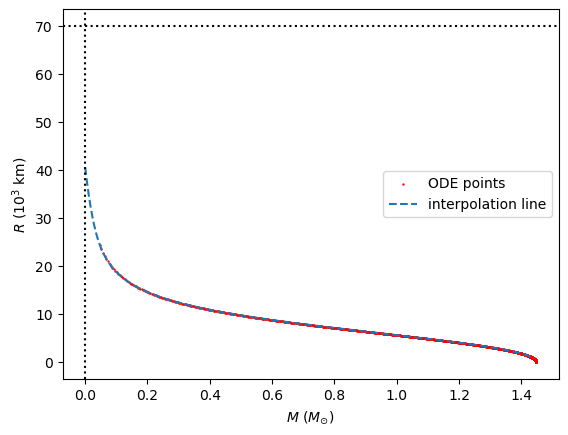

In [15]:
plt.scatter(M_star, R_star, s=0.5, color='red', label='ODE points')
plt.plot(M_inter, R_inter, linestyle='--', label='interpolation line')
plt.axvline(x=1/1047, linestyle=':', color='k')
plt.axhline(y=69.911, linestyle=':', color='k')
#plt.axvline(x=5.836/2**2, linestyle='--', color='red')
#plt.axvline(x=0.3, linestyle='--', color='red')
plt.xlabel(r'$M\ (M_{\odot})$')
plt.ylabel(r'$R\ (10^{3}\ \mathrm{km})$')
plt.legend()
#plt.savefig('/Users/zengyuhe/academic_doc/HWs/stellar/figures/Jupyter_radius_contrast.pdf')
plt.show()

In [16]:
print(inter_MR(1/1047))

40.1089590332805
